In [7]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [8]:
df = pd.read_csv("C:\\Users\\USER-11\\Downloads\\amazon_sales_dataset.csv")

In [9]:
df.shape

(50000, 13)

In [10]:
df.head()

,order_id,order_date,product_id,product_category,price,discount_percent,quantity_sold,customer_region,payment_method,rating,review_count,discounted_price,total_revenue
0,1,2022-04-13,2637,Books,128.75,10,4,North America,UPI,3.5,443,115.88,463.52
1,2,2023-03-12,2300,Fashion,302.60,20,5,Asia,Credit Card,3.7,475,242.08,1210.40
2,3,2022-09-28,3670,Sports,495.80,20,2,Europe,UPI,4.4,183,396.64,793.28
3,4,2022-04-17,2522,Books,371.95,15,4,Middle East,UPI,5.0,212,316.16,1264.64
4,5,2022-03-13,1717,Beauty,201.68,0,4,Middle East,UPI,4.6,308,201.68,806.72


In [11]:
df.isnull().sum()

order_id            0
order_date          0
product_id          0
product_category    0
price               0
discount_percent    0
quantity_sold       0
customer_region     0
payment_method      0
rating              0
review_count        0
discounted_price    0
total_revenue       0
dtype: int64

In [12]:
df.dtypes

order_id              int64
order_date           object
product_id            int64
product_category     object
price               float64
discount_percent      int64
quantity_sold         int64
customer_region      object
payment_method       object
rating              float64
review_count          int64
discounted_price    float64
total_revenue       float64
dtype: object

In [13]:
df.info

<bound method DataFrame.info of        order_id  order_date  product_id product_category   price  \
0             1  2022-04-13        2637            Books  128.75   
1             2  2023-03-12        2300          Fashion  302.60   
2             3  2022-09-28        3670           Sports  495.80   
3             4  2022-04-17        2522            Books  371.95   
4             5  2022-03-13        1717           Beauty  201.68   
...         ...         ...         ...              ...     ...   
49995     49996  2022-09-03        1433           Beauty   26.99   
49996     49997  2022-07-03        1428           Beauty  294.23   
49997     49998  2023-02-17        4651      Electronics  352.11   
49998     49999  2022-09-30        4371           Beauty  307.54   
49999     50000  2023-06-29        2944   Home & Kitchen  253.44   

       discount_percent  quantity_sold customer_region payment_method  rating  \
0                    10              4   North America            UPI 

In [6]:
df.corr

<bound method DataFrame.corr of        order_id  order_date  product_id product_category   price  \
0             1  2022-04-13        2637            Books  128.75   
1             2  2023-03-12        2300          Fashion  302.60   
2             3  2022-09-28        3670           Sports  495.80   
3             4  2022-04-17        2522            Books  371.95   
4             5  2022-03-13        1717           Beauty  201.68   
...         ...         ...         ...              ...     ...   
49995     49996  2022-09-03        1433           Beauty   26.99   
49996     49997  2022-07-03        1428           Beauty  294.23   
49997     49998  2023-02-17        4651      Electronics  352.11   
49998     49999  2022-09-30        4371           Beauty  307.54   
49999     50000  2023-06-29        2944   Home & Kitchen  253.44   

       discount_percent  quantity_sold customer_region payment_method  rating  \
0                    10              4   North America            UPI 

In [14]:
df['payment_method'].value_counts()

payment_method
Wallet              10106
UPI                 10078
Debit Card           9981
Cash on Delivery     9927
Credit Card          9908
Name: count, dtype: int64

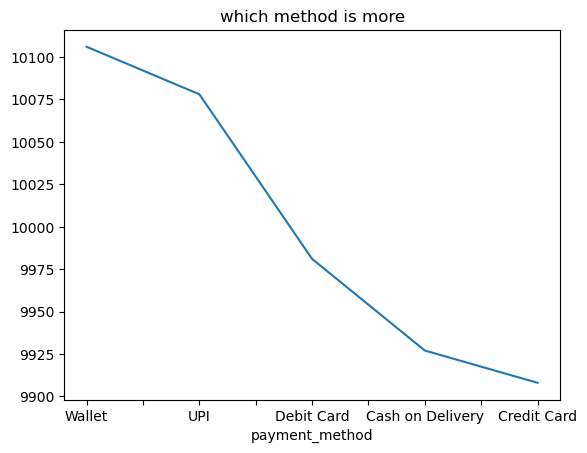

In [15]:
df['payment_method'].value_counts().plot(kind='line')
plt.title('which method is more')
plt.show()

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [17]:
x = df.drop(['order_id','order_date','product_id','product_category','price','discount_percent','quantity_sold','customer_region','rating','review_count','discounted_price','total_revenue'],axis=1)
y = df['payment_method']

In [18]:
numerical_cols=x.select_dtypes(include=['int64','float64']).columns.tolist()

In [19]:
categorical_cols = x.select_dtypes(include=['object']).columns.tolist()

In [20]:
numerical_transformer=Pipeline(steps=[
                               ('imputer',SimpleImputer(strategy='mean')),
                               ('scaler',StandardScaler())
])

In [21]:
categorical_transformer= Pipeline(steps=[
                            ('imputer',SimpleImputer(strategy='most_frequent')),
                            ('onehot',OneHotEncoder(handle_unknown='ignore'))
])

In [23]:
preprocessor = ColumnTransformer(transformers=[
                                 ('num',numerical_transformer,numerical_cols),
                                 ('cat',categorical_transformer,categorical_cols)
])

In [24]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
model_1 = Pipeline(steps=[
                   ('pre',preprocessor),('reg',RandomForestClassifier(n_estimators=100,random_state=42))
])

In [27]:
model_1.fit(X_train,y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  []),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['payment_method'])])),
                ('reg', RandomForestClassifier(random_state=42))])

In [28]:
prediction_1 = model_1.predict(X_test)


print(f'Accuracy:{accuracy_score(y_test,prediction_1)*100:.2f}')
print(f'precision:{precision_score(y_test,prediction_1,average='micro')*100:.2f}')
print(f'recall:{recall_score(y_test,prediction_1,average='micro')*100:.2f}')
print(f'f1:{f1_score(y_test,prediction_1,average='micro')*100:.2f}')

Accuracy:100.00
precision:100.00
recall:100.00
f1:100.00


In [29]:
from sklearn.tree import DecisionTreeClassifier

In [30]:
model_2 = Pipeline(steps=[
                     ('pre',preprocessor),('reg',DecisionTreeClassifier(max_depth=5,random_state=42))
])

In [31]:
model_2.fit(X_train,y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  []),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['payment_method'])])),
                ('reg', DecisionTreeClassifier(max_depth=5, random_state=42))])

In [32]:
prediction_2 = model_2.predict(X_test)


print(f'Accuracy:{accuracy_score(y_test,prediction_2)*100:.2f}')
print(f'precision:{precision_score(y_test,prediction_2,average='micro')*100:.2f}')
print(f'recall:{recall_score(y_test,prediction_2,average='micro')*100:.2f}')
print(f'f1:{f1_score(y_test,prediction_2,average='micro')*100:.2f}')

Accuracy:100.00
precision:100.00
recall:100.00
f1:100.00


In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
model_3 =Pipeline(steps=[
                ('pre',preprocessor),('reg',LogisticRegression())
])

In [35]:
model_3.fit(X_train,y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  []),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['payment_method'])])),
                ('reg', LogisticRegression())])

In [36]:
prediction_3 = model_3.predict(X_test)


print(f'Accuracy:{accuracy_score(y_test,prediction_3)*100:.2f}')
print(f'precision:{precision_score(y_test,prediction_3,average='micro')*100:.2f}')
print(f'recall:{recall_score(y_test,prediction_3,average='micro')*100:.2f}')
print(f'f1:{f1_score(y_test,prediction_3,average='micro')*100:.2f}')

Accuracy:100.00
precision:100.00
recall:100.00
f1:100.00
